In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
cancer=pd.read_csv("/content/survey-lung-cancer-null.csv")
cancer.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2.0,2.0,1,1.0,2.0,1,2.0,2,2,2,2,2,YES
1,M,74,2,1.0,1.0,1,2.0,2.0,2,1.0,1,1,2,2,2,YES
2,F,59,1,1.0,1.0,2,1.0,2.0,1,2.0,1,2,2,1,2,NO
3,M,63,2,2.0,2.0,1,1.0,1.0,1,1.0,2,1,1,2,2,NO
4,F,63,1,2.0,1.0,1,1.0,1.0,1,2.0,1,2,2,1,1,NO


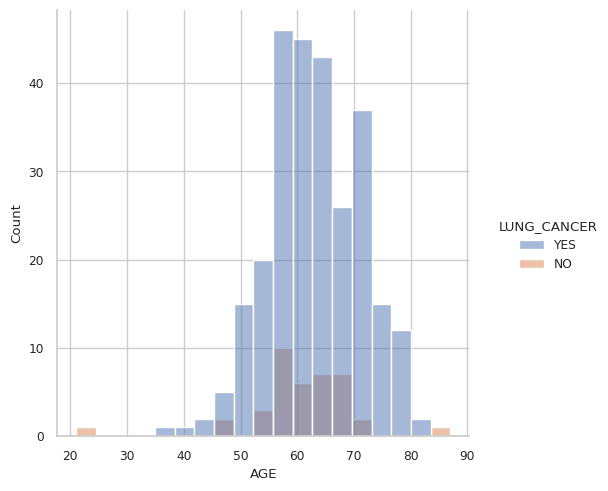

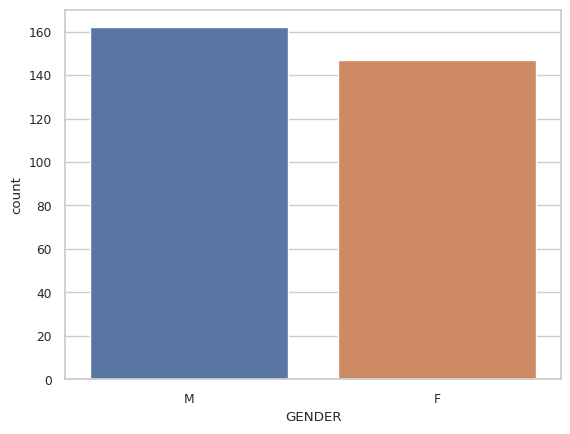

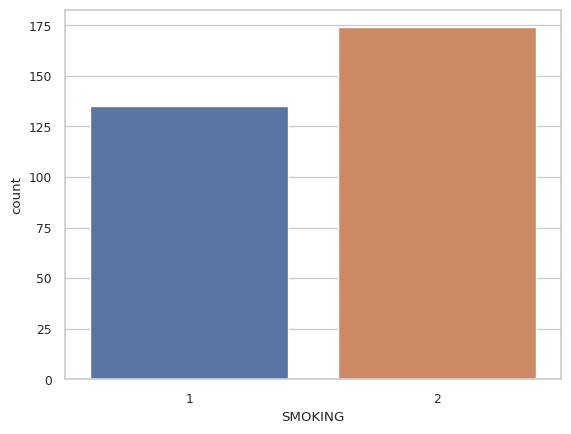

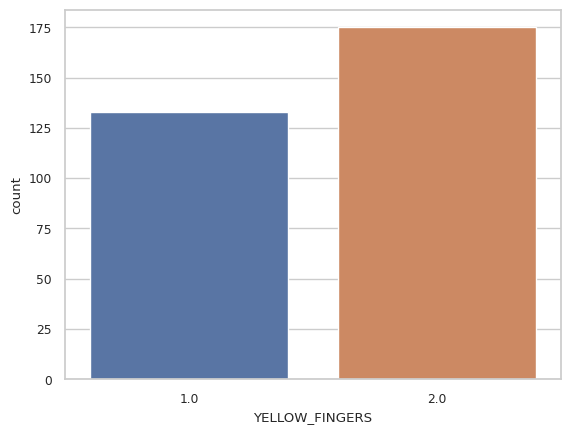

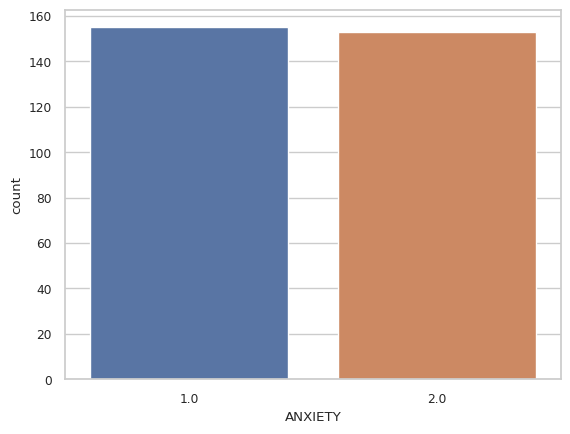

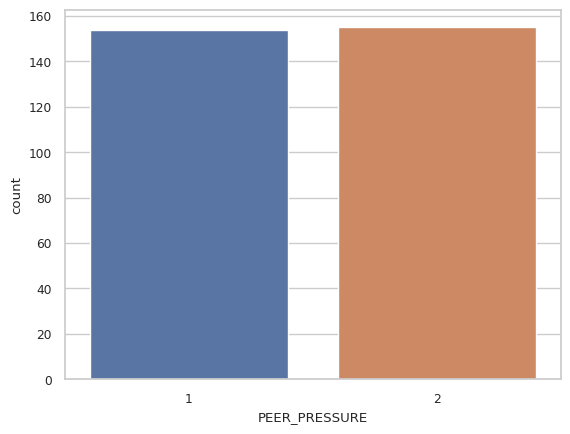

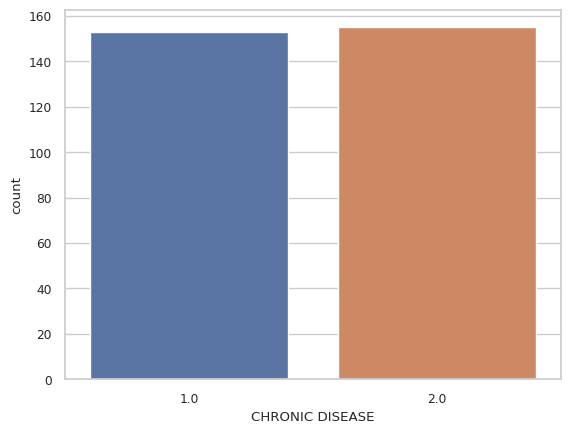

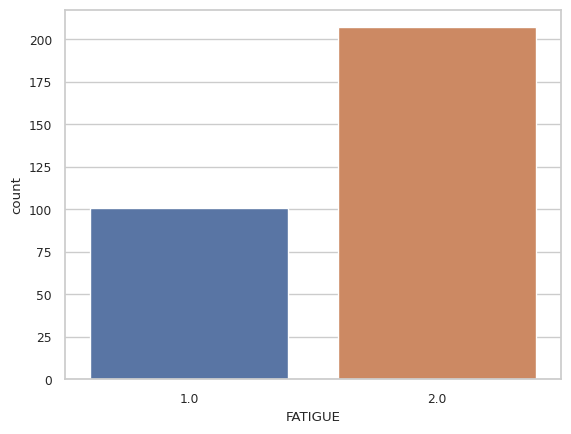

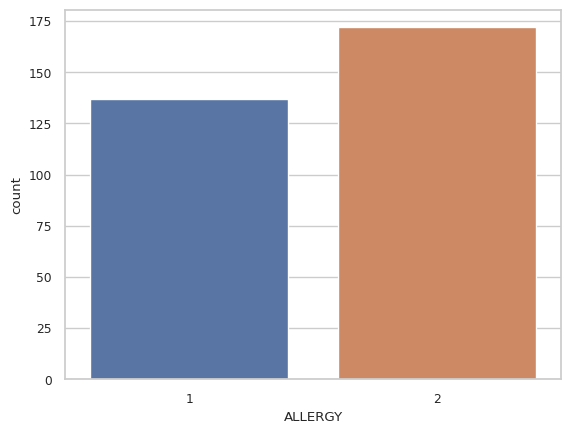

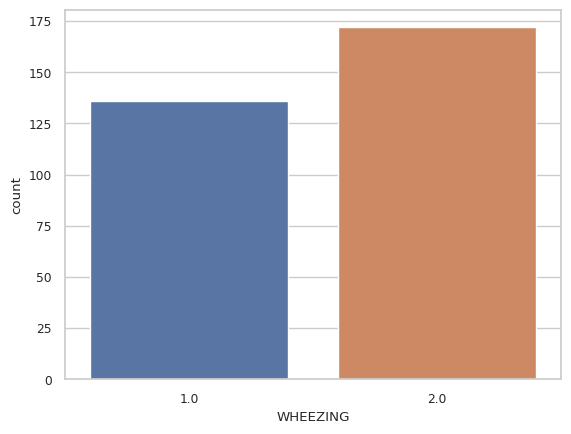

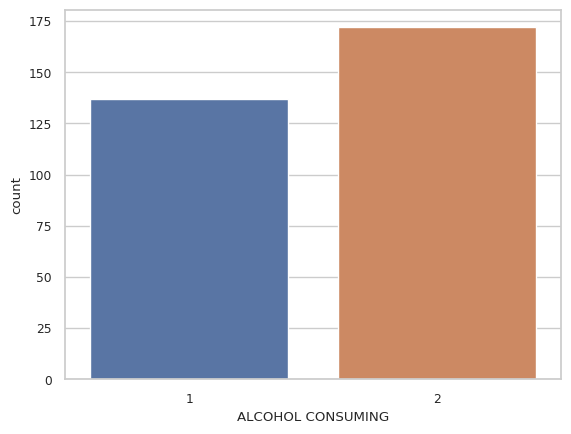

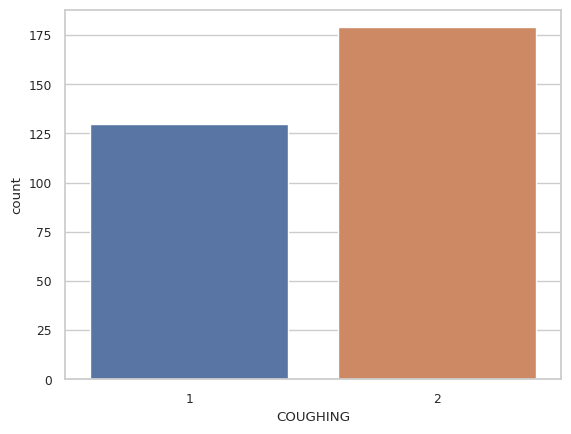

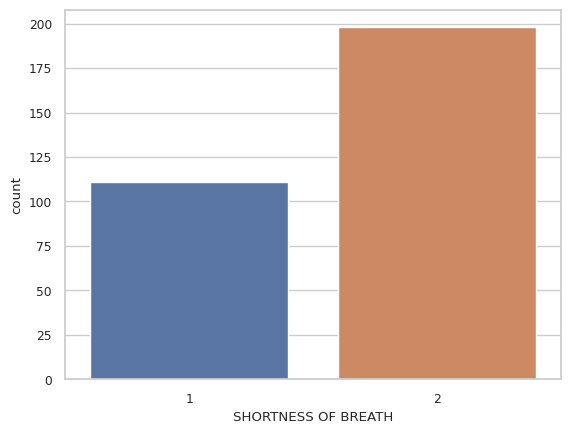

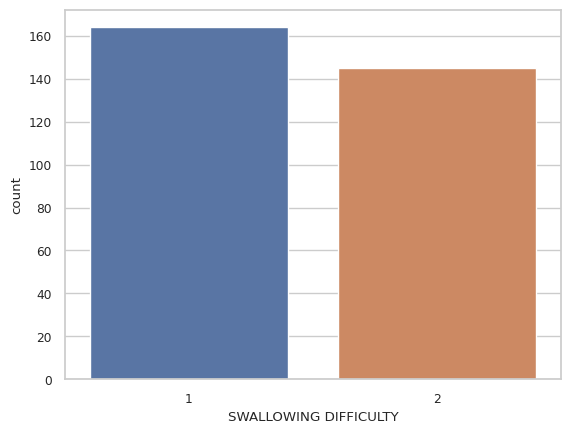

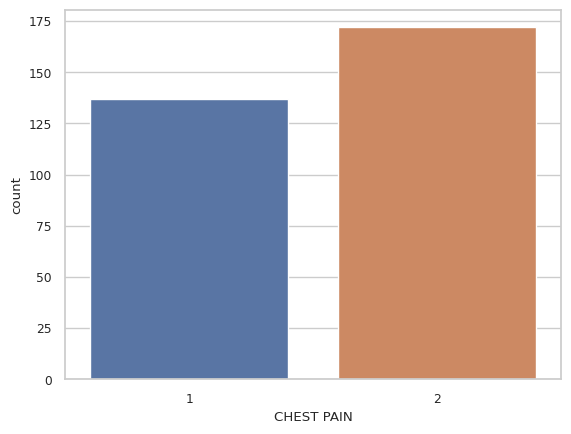

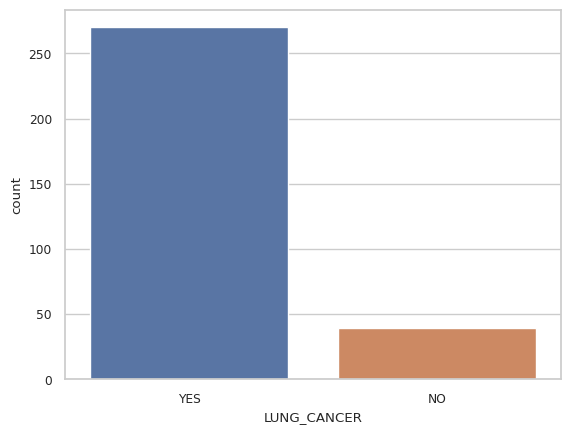

In [ ]:
sns.displot(data=cancer,x=cancer['AGE'],hue='LUNG_CANCER')
plt.show()
cat_col=cancer.drop(["AGE"],axis=1).columns
for i in cat_col:
	sns.countplot(x = cancer[i])
	plt.show()

DATA PREPROCESSING

In [ ]:
cancer.shape
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    309 non-null    int64  
 2   SMOKING                309 non-null    int64  
 3   YELLOW_FINGERS         308 non-null    float64
 4   ANXIETY                308 non-null    float64
 5   PEER_PRESSURE          309 non-null    int64  
 6   CHRONIC DISEASE        308 non-null    float64
 7   FATIGUE                308 non-null    float64
 8   ALLERGY                309 non-null    int64  
 9   WHEEZING               308 non-null    float64
 10  ALCOHOL CONSUMING      309 non-null    int64  
 11  COUGHING               309 non-null    int64  
 12  SHORTNESS OF BREATH    309 non-null    int64  
 13  SWALLOWING DIFFICULTY  309 non-null    int64  
 14  CHEST PAIN             309 non-null    int64  
 15  LUNG_C

In [ ]:
cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           1
ANXIETY                  1
PEER_PRESSURE            0
CHRONIC DISEASE          1
FATIGUE                  1
ALLERGY                  0
WHEEZING                 1
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
col=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
for i in col:
  print(f"Number of rows with null values in {i} column: ", cancer[i].isnull().sum())
  cancer= cancer[cancer[i].notnull()]
print("Shape after removing null values: ", cancer.shape)

Number of rows with null values in GENDER column:  0
Number of rows with null values in AGE column:  0
Number of rows with null values in SMOKING column:  0
Number of rows with null values in YELLOW_FINGERS column:  1
Number of rows with null values in ANXIETY column:  1
Number of rows with null values in PEER_PRESSURE column:  0
Number of rows with null values in CHRONIC DISEASE column:  1
Number of rows with null values in FATIGUE column:  1
Number of rows with null values in ALLERGY column:  0
Number of rows with null values in WHEEZING column:  1
Number of rows with null values in ALCOHOL CONSUMING column:  0
Number of rows with null values in COUGHING column:  0
Number of rows with null values in SHORTNESS OF BREATH column:  0
Number of rows with null values in SWALLOWING DIFFICULTY column:  0
Number of rows with null values in CHEST PAIN column:  0
Number of rows with null values in LUNG_CANCER column:  0
Shape after removing null values:  (304, 16)


In [ ]:
cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,62.644737,1.565789,1.569079,1.500000,1.503289,1.503289,1.671053,1.552632,1.555921,1.555921,1.578947,1.644737,1.470395,1.552632
std,8.230514,0.496470,0.496022,0.500824,0.500814,0.500814,0.470605,0.498042,0.497682,0.497682,0.494542,0.479382,0.499946,0.498042
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in cancer.columns:
    cancer[column] = cancer[column].replace({1: 0, 2: 1})
enc=LabelEncoder()
cancer["GENDER"]= enc.fit_transform(cancer["GENDER"])
cancer["LUNG_CANCER"]= enc.fit_transform(cancer["LUNG_CANCER"])
cancer.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1.0,1.0,0,0.0,1.0,0,1.0,1,1,1,1,1,1
1,1,74,1,0.0,0.0,0,1.0,1.0,1,0.0,0,0,1,1,1,1
2,0,59,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,1,0,1,0
3,1,63,1,1.0,1.0,0,0.0,0.0,0,0.0,1,0,0,1,1,0
4,0,63,0,1.0,0.0,0,0.0,0.0,0,1.0,0,1,1,0,0,0


In [ ]:
cancer['LUNG_CANCER'].value_counts()

1    265
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
cancer_corr=cancer.corr()
cancer_corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.024435,0.040387,-0.205922,-0.151477,-0.263746,-0.211058,-0.079864,0.160688,0.127362,0.458737,0.132690,-0.062106,-0.076436,0.359370,0.066921
AGE,0.024435,1.000000,-0.090375,0.003606,0.047239,0.016298,-0.006121,0.008072,0.024705,0.058849,0.066906,0.179619,-0.027912,-0.008179,-0.026018,0.088759
SMOKING,0.040387,-0.090375,1.000000,-0.011815,0.159280,-0.047331,-0.140246,-0.020073,-0.000702,-0.128474,-0.048332,-0.128759,0.056928,0.027818,0.119425,0.060843
YELLOW_FINGERS,-0.205922,0.003606,-0.011815,1.000000,0.564625,0.317936,0.052225,-0.128548,-0.141681,-0.069177,-0.283084,-0.002124,-0.104644,0.340990,-0.101603,0.182628
ANXIETY,-0.151477,0.047239,0.159280,0.564625,1.000000,0.217110,0.006579,-0.196039,-0.158777,-0.191994,-0.152271,-0.213201,-0.151211,0.481107,-0.119083,0.147549
PEER_PRESSURE,-0.263746,0.016298,-0.047331,0.317936,0.217110,1.000000,0.052591,0.074622,-0.086702,-0.053705,-0.159636,-0.087667,-0.228811,0.369467,-0.086702,0.189423
CHRONIC DISEASE,-0.211058,-0.006121,-0.140246,0.052225,0.006579,0.052591,1.000000,-0.107419,0.098541,-0.053705,-0.013982,-0.194269,-0.022610,0.092659,-0.033776,0.110729
FATIGUE,-0.079864,0.008072,-0.020073,-0.128548,-0.196039,0.074622,-0.107419,1.000000,0.003706,0.149256,-0.188933,0.154495,0.445804,-0.139720,-0.010375,0.150136
ALLERGY,0.160688,0.024705,-0.000702,-0.141681,-0.158777,-0.086702,0.098541,0.003706,1.000000,0.181153,0.340933,0.184067,-0.032012,-0.053367,0.241597,0.327462
WHEEZING,0.127362,0.058849,-0.128474,-0.069177,-0.191994,-0.053705,-0.053705,0.149256,0.181153,1.000000,0.267149,0.377574,0.042046,0.072997,0.141208,0.251049


<Axes: title={'center': 'Correlation Matrix\n'}>

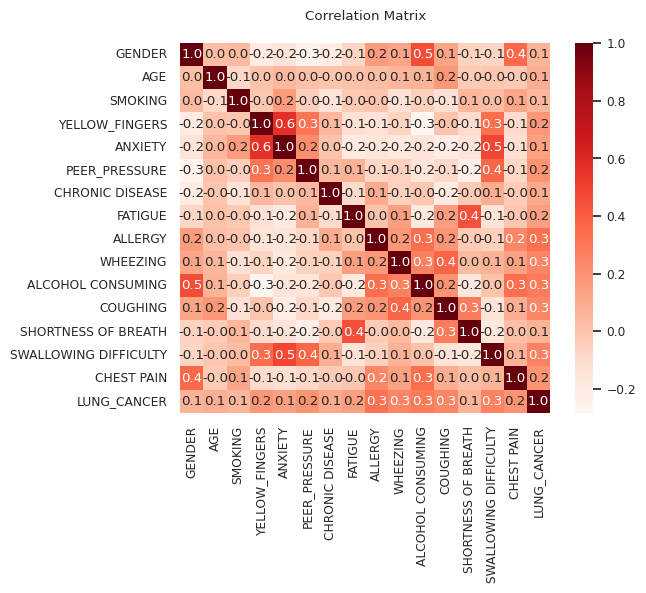

In [ ]:
plt.title("Correlation Matrix\n")
sns.heatmap(cancer_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<Axes: title={'center': 'Correlation Matrix\n'}>

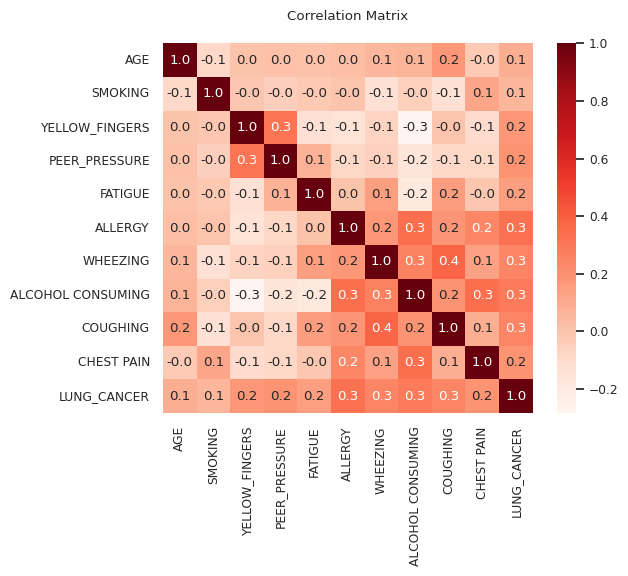

In [ ]:
cancer=cancer.drop(['GENDER','SWALLOWING DIFFICULTY','SHORTNESS OF BREATH','CHRONIC DISEASE','ANXIETY'],axis=1)
cancer_corr=cancer.corr()
plt.title("Correlation Matrix\n")
sns.heatmap(cancer_corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [ ]:

x=cancer.drop(['LUNG_CANCER'],axis=1)
y=cancer['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION





In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)
prediction1=log.predict(X_test)
accuracy1=accuracy_score(y_test, prediction1)
precision1 = precision_score(y_test, prediction1)
recall1 = recall_score(y_test, prediction1)

In [ ]:
print(f'Accuracy: {accuracy1*100:.2f}%')
print(f"Precision: {precision1*100:.2f}%")
print(f"Recall: {recall1*100:.2f}%")

Accuracy: 90.22%
Precision: 92.77%
Recall: 96.25%


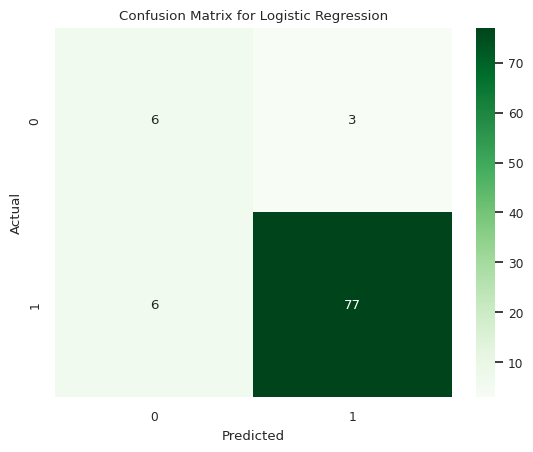

In [ ]:
from sklearn.metrics import confusion_matrix
mat1=confusion_matrix(prediction1, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat1, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

NEURAL NETWORKS

In [ ]:
##Neural Networks
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nn.fit(X_train, y_train)
prediction2=nn.predict(X_test)
accuracy2=accuracy_score(y_test, prediction2)
precision2 = precision_score(y_test, prediction2)
recall2 = recall_score(y_test, prediction2)

In [ ]:
print(f'Accuracy: {accuracy2*100:.2f}%')
print(f"Precision: {precision2*100:.2f}%")
print(f"Recall: {recall2*100:.2f}%")

Accuracy: 88.04%
Precision: 90.59%
Recall: 96.25%


In [ ]:
print(prediction2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


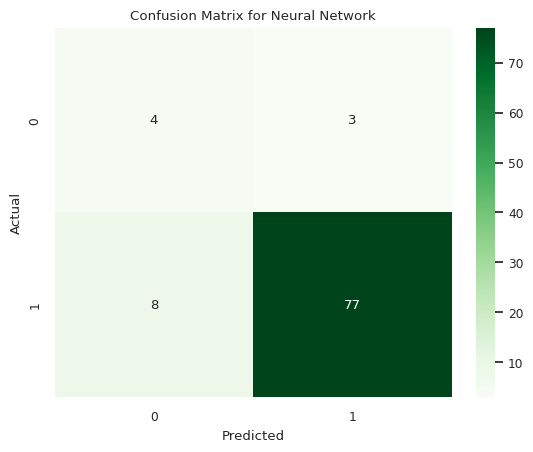

In [ ]:
from sklearn.metrics import confusion_matrix
mat2=confusion_matrix(prediction2, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat2, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network")
plt.show()

Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
dec_tree = RandomForestClassifier(n_estimators=100)
dec_tree.fit(X_train, y_train)
prediction3=dec_tree.predict(X_test)
accuracy3=accuracy_score(y_test, prediction3)
precision3 = precision_score(y_test, prediction3)
recall3 = recall_score(y_test, prediction3)

In [ ]:
print(f'Accuracy: {accuracy3*100:.2f}%')
print(f"Precision: {precision3*100:.2f}%")
print(f"Recall: {recall3*100:.2f}%")

Accuracy: 86.96%
Precision: 91.46%
Recall: 93.75%


In [ ]:
print(prediction3)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


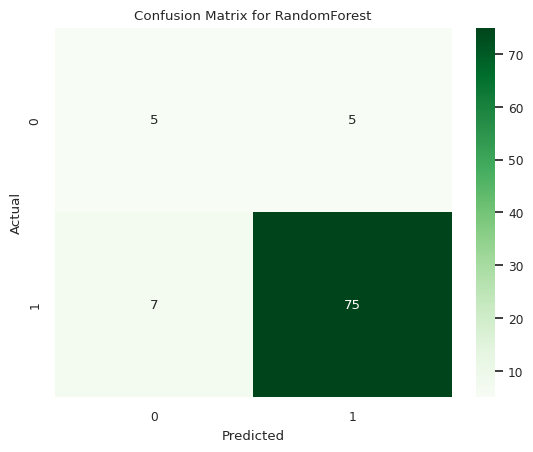

In [ ]:
from sklearn.metrics import confusion_matrix
mat3=confusion_matrix(prediction3, y_test)
sns.set(font_scale=0.8)
sns.heatmap(mat3, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RandomForest")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediction4=knn.predict(X_test)
accuracy4=accuracy_score(y_test, prediction4)
precision4 = precision_score(y_test, prediction4)
recall4 = recall_score(y_test, prediction4)

In [ ]:
print(f'Accuracy: {accuracy4*100:.2f}%')
print(f"Precision: {precision4*100:.2f}%")
print(f"Recall: {recall4*100:.2f}%")

Accuracy: 90.22%
Precision: 93.83%
Recall: 95.00%


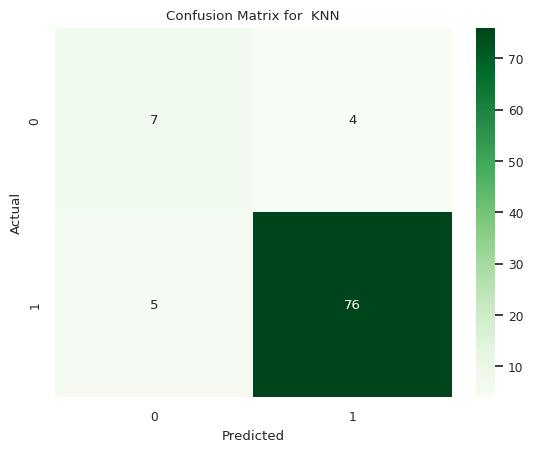

In [ ]:
from sklearn.metrics import confusion_matrix
mat4=confusion_matrix(prediction4, y_test)

sns.set(font_scale=0.8)
sns.heatmap(mat4, annot=True, fmt="d", cmap="Greens",
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for  KNN")
plt.show()

In [ ]:
print(prediction4)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


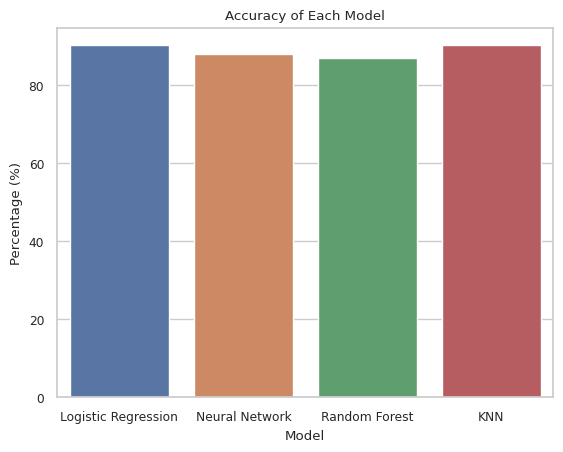

In [ ]:
#Model Comparison
categories = ['Logistic Regression', 'Neural Network', 'Random Forest', 'KNN']
percentages = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100]
sns.set(style="whitegrid",font_scale=0.8)
sns.barplot(x=categories, y=percentages)
plt.xlabel("Model")
plt.ylabel("Percentage (%)")
plt.title("Accuracy of Each Model")
plt.show()

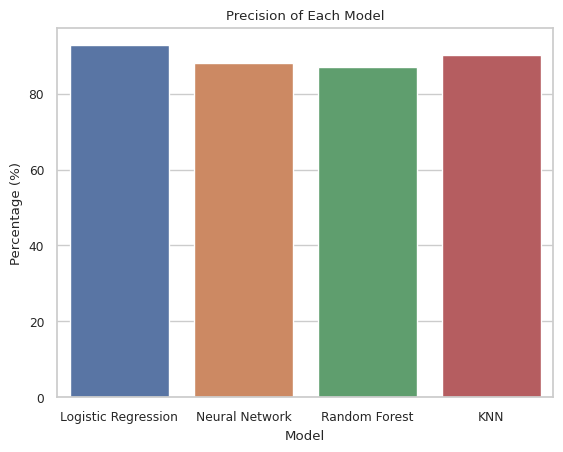

In [ ]:
categories = ['Logistic Regression', 'Neural Network', 'Random Forest', 'KNN']
percentages = [precision1*100, accuracy2*100, accuracy3*100, accuracy4*100]
sns.set(style="whitegrid",font_scale=0.8)
sns.barplot(x=categories, y=percentages)
plt.xlabel("Model")
plt.ylabel("Percentage (%)")
plt.title("Precision of Each Model")
plt.show()

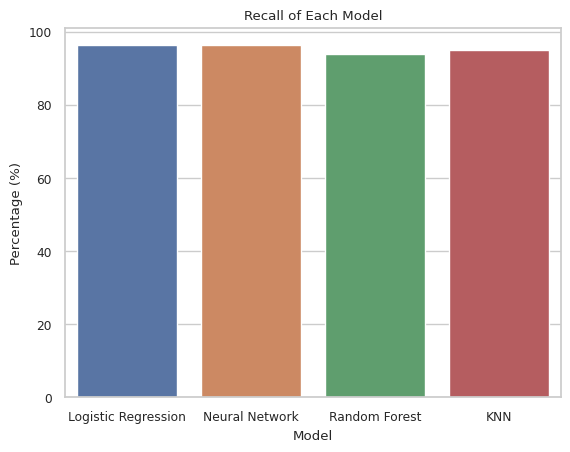

In [ ]:
categories = ['Logistic Regression', 'Neural Network', 'Random Forest', 'KNN']
percentages = [recall1*100, recall2*100, recall3*100, recall4*100]
sns.set(style="whitegrid",font_scale=0.8)
sns.barplot(x=categories, y=percentages)
plt.xlabel("Model")
plt.ylabel("Percentage (%)")
plt.title("Recall of Each Model")
plt.show()